In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Ml Projects/gold price.csv', parse_dates=True, index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [4]:
df['Returns'] = df['USD (PM)'].pct_change()*100
df['Lagged_Returns'] = df.Returns.shift()

In [5]:
df = df.dropna()
train = df['2001':'2008']
test = df['2009']
warnings.filterwarnings('ignore')

Create train and test set from dependent and independent variables

In [6]:
X_train = train["Lagged_Returns"].to_frame()
y_train = train["Returns"]
X_test = test["Lagged_Returns"].to_frame()
y_test = test["Returns"]

In [7]:
# Creating a model on the train and test set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


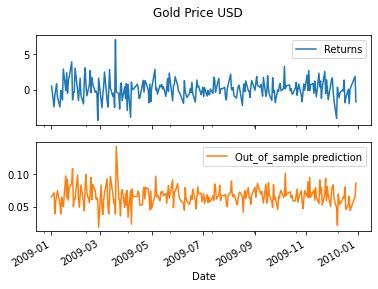

In [8]:
# Lets plot the results of gold price pridiction from the above LinearRegression model
out_of_sample_results = y_test.to_frame()
# Adding out_of_sample column to the dataframe
out_of_sample_results["Out_of_sample prediction"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold Price USD')
plt.show()